In [5]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [6]:
df = pd.read_excel('../stats/ANALIZISRE/all_data.xlsx')

In [7]:
df.columns

Index(['stimulus_name', 'stimulus_type', 'stimulus_id', 'stimulus_plaus',
       'word_order', 'nom_1_X', 'nom_2_O', 'retried', 'key_resp.keys',
       'answer', 'answer_role', 'key_resp.rt', 'nom1_indented',
       'nom2_indented', 'stimulus.started', 'stimulus.stopped', 'participant',
       'session', 'date', 'list_name', 'random_seed', 'frameRate',
       'Unnamed: 22'],
      dtype='object')

In [4]:
bins = np.linspace(1, 8, 15)

## Plauzibilis és implauzibilis jeleneteknél különböző idő alatt nyomják-e a tesztalanyok a gombot?

(0.9830576181411743, 1.437859520336815e-08)
4.026989659090909 1.3829338514614737
(0.9781509041786194, 3.300081874435534e-10)
3.813581136363637 1.3357039884827435
MannwhitneyuResult(statistic=352071.5, pvalue=0.0004917592729558675)


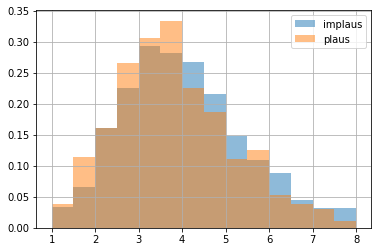

In [75]:
s1, s2 = df.loc[df['stimulus_plaus'] == 'implaus']['key_resp.rt'], df.loc[df['stimulus_plaus'] == 'plaus']['key_resp.rt']
print(stats.shapiro(s1))
print(np.mean(s1), np.std(s1))
print(stats.shapiro(s2))
print(np.mean(s2), np.std(s2))
print(stats.mannwhitneyu(s1, s2))

plt.figure(figsize = (6,4))
plt.hist(s1, alpha = 0.5, bins=bins, density=True, label = 'implaus')
plt.hist(s2, alpha = 0.5, bins=bins, density=True, label = 'plaus')
plt.legend()
plt.grid()
plt.show()

### Igen, az implauzibilis nehezebb.
Nem normálisak az eloszlások, nem tudunk paraméteres próbát használni, így Mann Whitneyt kell használnunk.
Ez azt mutatja, hogy szignifikáns a különbség, tehát az implauzibilis jeleneteknél több időt töltöttek a gomb megnyomásával.

## A mondat szórendje befolyásolja-e a gombnyomás idejét?

(0.9838947653770447, 0.00021533644758164883)
3.951196212121212 1.4357568135437029
(0.9665507674217224, 4.73958206015368e-09)
3.6405493801652895 1.4110438851011808
MannwhitneyuResult(statistic=83035.0, pvalue=0.0003232351523540144)


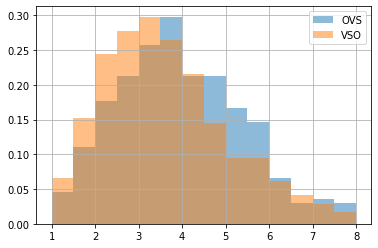

In [76]:
s1, s2 = df.loc[df['word_order'] == 'OVS']['key_resp.rt'], df.loc[df['word_order'] == 'SVO']['key_resp.rt']
print(stats.shapiro(s1))
print(np.mean(s1), np.std(s1))
print(stats.shapiro(s2))
print(np.mean(s2), np.std(s2))

print(stats.mannwhitneyu(s1, s2))

plt.figure(figsize = (6,4))
plt.hist(s1, alpha = 0.5, bins=bins, density=True, label = 'OVS')
plt.hist(s2, alpha = 0.5, bins=bins, density=True, label = 'VSO')
plt.legend()
plt.grid()
plt.show()

### Igen, az OVS több idő.

## Gombnyomások befolyása a gomb és a válasz helyzetére? (fent, lent, o, x)

(0.9785735607147217, 6.754377612772089e-10)
3.896769194865811 1.3588178742950747
(0.9819102883338928, 3.864282227539206e-09)
3.94260365448505 1.36795322552275
MannwhitneyuResult(statistic=379299.5, pvalue=0.236842376347824)


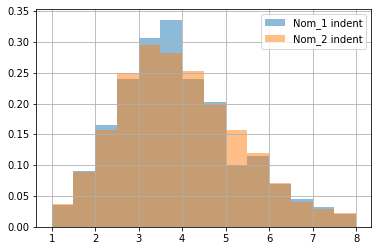

(0.9776185154914856, 1.4952426796721596e-10)
3.9135073089701 1.354137300410475
(0.9831515550613403, 2.2901623708548868e-08)
3.922669626168224 1.3674052424628236
MannwhitneyuResult(statistic=382946.0, pvalue=0.3698545787135207)


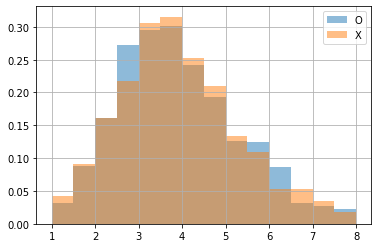

In [77]:
s1, s2 = df.loc[df['nom1_indented'] == 0]['key_resp.rt'], df.loc[df['nom1_indented'] == 1]['key_resp.rt']
print(stats.shapiro(s1))
print(np.mean(s1), np.std(s1))
print(stats.shapiro(s2))
print(np.mean(s2), np.std(s2))
print(stats.mannwhitneyu(s1, s2))
plt.figure(figsize = (6,4))
plt.hist(s1, alpha = 0.5, bins=bins, density=True, label = 'Nom_1 indent')
plt.hist(s2, alpha = 0.5, bins=bins, density=True, label = 'Nom_2 indent')
plt.legend()
plt.grid()
plt.show()
s1, s2 = df.loc[df['key_resp.keys'] == 'o']['key_resp.rt'], df.loc[df['key_resp.keys'] == 'x']['key_resp.rt']
print(stats.shapiro(s1))
print(np.mean(s1), np.std(s1))
print(stats.shapiro(s2))
print(np.mean(s2), np.std(s2))
print(stats.mannwhitneyu(s1, s2))



plt.figure(figsize = (6,4))
plt.hist(s1, alpha = 0.5, bins=bins, density=True, label = 'O')
plt.hist(s2, alpha = 0.5, bins=bins, density=True, label = 'X')
plt.legend()
plt.grid()
plt.show()

### **Nem** befolyásolja az indentálás és a gomb helye a válaszidőt.

## Ágens/páciens alapú válasz befolyása a válaszidőre

(0.9912786483764648, 0.03080090507864952)
4.156793663911846 1.3855738568838416
(0.9771661758422852, 4.4363540347824165e-14)
3.8558640401146134 1.3471347023962734
MannwhitneyuResult(statistic=218370.0, pvalue=2.4513073196336298e-05)


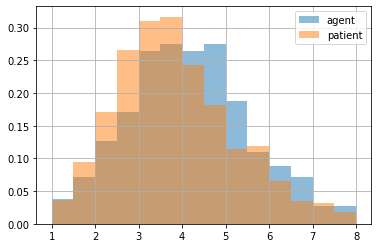

In [78]:
s1, s2 = df.loc[df['answer_role'] == 'a']['key_resp.rt'], df.loc[df['answer_role'] == 'p']['key_resp.rt']
print(stats.shapiro(s1))
print(np.mean(s1), np.std(s1))
print(stats.shapiro(s2))
print(np.mean(s2), np.std(s2))
print(stats.mannwhitneyu(s1, s2))

plt.figure(figsize = (6,4))
plt.hist(s1, alpha = 0.5, bins=bins, density=True, label = 'agent')
plt.hist(s2, alpha = 0.5, bins=bins, density=True, label = 'patient')
plt.legend()
plt.grid()
plt.show()

### Befolyásolja, különbözőek, az ágens nehezebb.

# Association rules

In [8]:
answers_by_person = defaultdict(list)
for line in df[['stimulus_type', 'stimulus_id', 'stimulus_plaus', 'answer_role', 'participant']].values.astype(str):
    answers_by_person[line[4]] += ['+'.join(line[:4])]

In [9]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [10]:
dataset = list(answers_by_person.values())

In [19]:
len(dataset)

22

In [16]:
sorted([a for x in dataset for a in x])

['image+1+plaus+a',
 'image+1+plaus+a',
 'image+1+plaus+a',
 'image+1+plaus+a',
 'image+1+plaus+a',
 'image+1+plaus+p',
 'image+1+plaus+p',
 'image+1+plaus+p',
 'image+1+plaus+p',
 'image+1+plaus+p',
 'image+1+plaus+p',
 'image+1+plaus+p',
 'image+1+plaus+p',
 'image+1+plaus+p',
 'image+1+plaus+p',
 'image+1+plaus+p',
 'image+1+plaus+p',
 'image+1+plaus+p',
 'image+1+plaus+p',
 'image+1+plaus+p',
 'image+1+plaus+p',
 'image+1+plaus+p',
 'image+10+implaus+a',
 'image+10+implaus+a',
 'image+10+implaus+a',
 'image+10+implaus+a',
 'image+10+implaus+a',
 'image+10+implaus+p',
 'image+10+implaus+p',
 'image+10+implaus+p',
 'image+10+implaus+p',
 'image+10+implaus+p',
 'image+10+implaus+p',
 'image+10+implaus+p',
 'image+10+implaus+p',
 'image+10+implaus+p',
 'image+10+implaus+p',
 'image+10+implaus+p',
 'image+10+implaus+p',
 'image+10+implaus+p',
 'image+10+implaus+p',
 'image+10+implaus+p',
 'image+10+implaus+p',
 'image+10+implaus+p',
 'image+11+plaus+a',
 'image+11+plaus+a',
 'image+11+p

In [20]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)



In [21]:
df.columns

Index(['stimulus_name', 'stimulus_type', 'stimulus_id', 'stimulus_plaus',
       'word_order', 'nom_1_X', 'nom_2_O', 'retried', 'key_resp.keys',
       'answer', 'answer_role', 'key_resp.rt', 'nom1_indented',
       'nom2_indented', 'stimulus.started', 'stimulus.stopped', 'participant',
       'session', 'date', 'list_name', 'random_seed', 'frameRate',
       'Unnamed: 22'],
      dtype='object')

In [22]:
df_assoc = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
frequent_itemsets = apriori(df_assoc, min_support=0.6, use_colnames=True)

frequent_itemsets